In [238]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from scipy import stats
%matplotlib inline

In [239]:
title = ['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape',
         'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
         'Normal Nucleoli', 'Mitoses', 'Class']
df = pd.read_csv('breast-cancer-wisconsin.data', names = title)
df.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
Sample code number             699 non-null int64
Clump Thickness                699 non-null int64
Uniformity of Cell Size        699 non-null int64
Uniformity of Cell Shape       699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Bland Chromatin                699 non-null int64
Normal Nucleoli                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 57.4+ KB


As we can see there are no missing data within the data set since all columns have 699 values exactly, however based on the indicated data type of the column "Bare Nuclei" that mostly contains integer numbers we can conclude that some rows of the data set should contain values that are not numeric. For further analysis we have to clear our data by deleting the unproper rows and also turning the "Bare Nuclei" column values to the "int64" type.

In [241]:
df = df[df['Bare Nuclei'] != '?']
df['Bare Nuclei'] = df['Bare Nuclei'].astype('int64')
df.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [242]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 11 columns):
Sample code number             683 non-null int64
Clump Thickness                683 non-null int64
Uniformity of Cell Size        683 non-null int64
Uniformity of Cell Shape       683 non-null int64
Marginal Adhesion              683 non-null int64
Single Epithelial Cell Size    683 non-null int64
Bare Nuclei                    683 non-null int64
Bland Chromatin                683 non-null int64
Normal Nucleoli                683 non-null int64
Mitoses                        683 non-null int64
Class                          683 non-null int64
dtypes: int64(11)
memory usage: 64.0 KB


The column "Sample code number" is the ids column and can't give us any interesting information. Therefore, we delete this column from the data set for further analysis.

In [243]:
df = df.drop('Sample code number', axis = 1)

In [244]:
df.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


Since the values within the data set are the range values we should use Spearman or Kendall coefficient for our correlation analysis.

In [245]:
corr_coeff = df.corr(method = 'spearman')
corr_coeff

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
Clump Thickness,1.000000,0.663684,0.666652,0.543815,0.586755,0.590770,0.533848,0.566398,0.421208,0.683080
Uniformity of Cell Size,0.663684,1.000000,0.894978,0.745475,0.792814,0.769543,0.720595,0.752510,0.512688,0.860299
Uniformity of Cell Shape,0.666652,0.894978,1.000000,0.718722,0.765073,0.752950,0.694888,0.724410,0.478400,0.843245
Marginal Adhesion,0.543815,0.745475,0.718722,1.000000,0.665190,0.696792,0.628738,0.636409,0.447254,0.737737
Single Epithelial Cell Size,0.586755,0.792814,0.765073,0.665190,1.000000,0.694579,0.645090,0.710628,0.483210,0.775066
Bare Nuclei,0.590770,0.769543,0.752950,0.696792,0.694579,1.000000,0.678963,0.659762,0.474316,0.835444
Bland Chromatin,0.533848,0.720595,0.694888,0.628738,0.645090,0.678963,1.000000,0.662096,0.390600,0.744571
Normal Nucleoli,0.566398,0.752510,0.724410,0.636409,0.710628,0.659762,0.662096,1.000000,0.510210,0.748601
Mitoses,0.421208,0.512688,0.478400,0.447254,0.483210,0.474316,0.390600,0.510210,1.000000,0.527379
Class,0.683080,0.860299,0.843245,0.737737,0.775066,0.835444,0.744571,0.748601,0.527379,1.000000


To concentrate on the strong correlations only we should filter the correlation matrix above, leaving the correlation coefficiets that are larger than the value of 0.8 corresponding to the strong correlation dependencies.

In [246]:
corr_col_titles = []
for i in corr_coeff:
    for j in corr_coeff[i].index:
        if corr_coeff[i][j] > 0.8:
            if i != j:
                print('"'+i+'"', '"'+j+'"', corr_coeff[i][j])
                if i not in corr_col_titles:
                    corr_col_titles.append(i)
corr_col_titles

"Uniformity of Cell Size" "Uniformity of Cell Shape" 0.8949775676224728
"Uniformity of Cell Size" "Class" 0.8602989143736787
"Uniformity of Cell Shape" "Uniformity of Cell Size" 0.8949775676224728
"Uniformity of Cell Shape" "Class" 0.8432454428776874
"Bare Nuclei" "Class" 0.8354435213280452
"Class" "Uniformity of Cell Size" 0.8602989143736787
"Class" "Uniformity of Cell Shape" 0.8432454428776874
"Class" "Bare Nuclei" 0.8354435213280452


['Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Bare Nuclei', 'Class']

Using the filtered columns printed above we'll show the reduced correlation matrix.

In [247]:
corr_coeff=df[corr_col_titles].corr()
corr_coeff

,Uniformity of Cell Size,Uniformity of Cell Shape,Bare Nuclei,Class
Uniformity of Cell Size,1.000000,0.907228,0.691709,0.820801
Uniformity of Cell Shape,0.907228,1.000000,0.713878,0.821891
Bare Nuclei,0.691709,0.713878,1.000000,0.822696
Class,0.820801,0.821891,0.822696,1.000000


The values of the correlation matrix presented above are more convenient to be illustrated using the corresponding heat map.

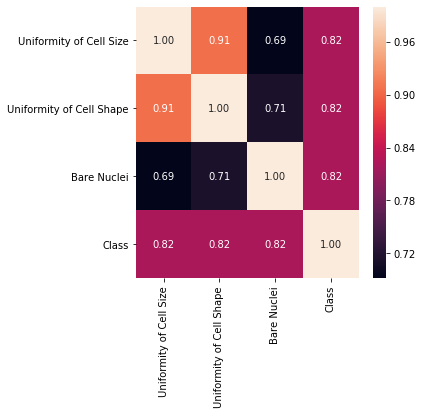

In [248]:
plt.figure(figsize = (5, 5))
sb.heatmap(corr_coeff, annot = True, fmt='.2f')

Based on the correlation coefficient values presented either in matrix form or as a heat map we can conclude that the classification of cancer is highly depends (with the correlation value of 0.82) on the following features: "Uniformity of Cell Size", "Uniformity of Cell Shape", "Bare Nuclei".

At first we demonstrate the plots of regression line.

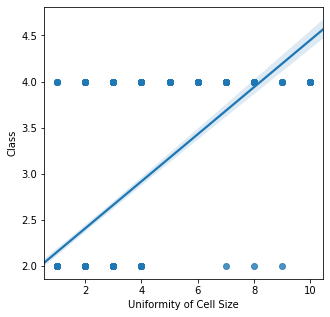

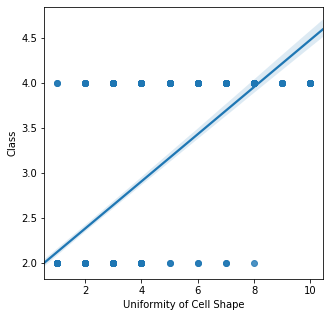

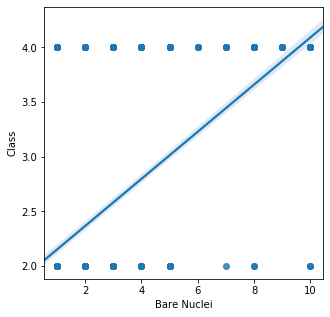

In [249]:
for i in corr_col_titles:
    if i != 'Class':
        plt.figure(figsize = (5, 5))
        sb.regplot(x = i, y = 'Class', data = df)

Now we show the box plots.

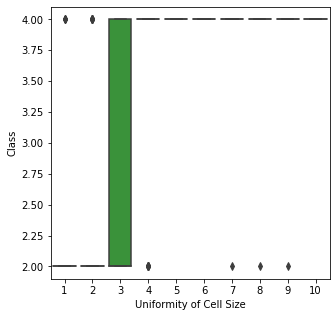

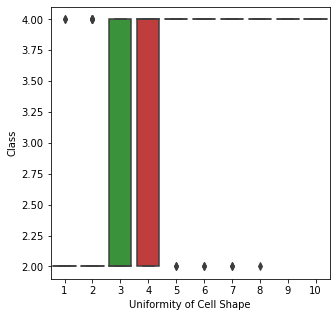

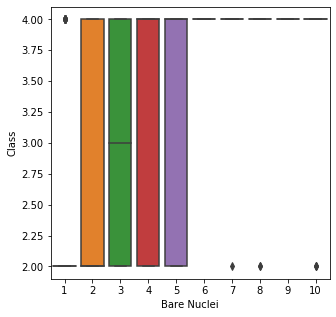

In [250]:
for i in corr_col_titles:
    if i != 'Class':
        plt.figure(figsize = (5, 5))
        sb.boxplot(x = i, y = 'Class', data = df)

Proper regression analysis should include the p-value for Spearman correlation coefficient that indicates the statistical significance of the analysed correlations. The correspondins p-values, presented below are extremely small. So we can conclude that correlations between "Class" and "Uniformity of Cell Size", "Uniformity of Cell Shape" and "Bare Nuclei" features are trustworthy.

In [251]:
for i in corr_col_titles:
    if i != 'Class':
        spearman_coeff, p_value = stats.spearmanr(df[i], df['Class'])
        print('Spearman coefficient for "', i, '- Class" correlation: ', spearman_coeff,
              '\nand the corresponding p-value: ', p_value)

Spearman coefficient for " Uniformity of Cell Size - Class" correlation:  0.8602989143736788 
and the corresponding p-value:  1.922120510515003e-201
Spearman coefficient for " Uniformity of Cell Shape - Class" correlation:  0.8432454428776875 
and the corresponding p-value:  9.173472841657559e-186
Spearman coefficient for " Bare Nuclei - Class" correlation:  0.8354435213280451 
and the corresponding p-value:  3.3272611180022025e-179


In [252]:
df['Uniformity of Cell Size'].value_counts().sort_index().to_frame()
uniformity_of_cell_size_counts = df['Uniformity of Cell Size'].value_counts().sort_index().to_frame()
uniformity_of_cell_size_counts.rename(columns = {'Uniformity of Cell Size': 'value_counts'}, inplace = True)
uniformity_of_cell_size_counts.index.name = 'Uniformity of Cell Size'
uniformity_of_cell_size_counts

,value_counts
Uniformity of Cell Size,
1,373
2,45
3,52
4,38
5,30
6,25
7,19
8,28
9,6


In [260]:
grouped_test = df[['Uniformity of Cell Size', 'Class']].groupby('Uniformity of Cell Size')
f_coeff, p_value = stats.f_oneway(grouped_test.get_group(1)['Class'], 
                                  grouped_test.get_group(2)['Class'], 
                                  grouped_test.get_group(3)['Class'],
                                  grouped_test.get_group(4)['Class'], 
                                  grouped_test.get_group(5)['Class'], 
                                  grouped_test.get_group(6)['Class'],
                                  grouped_test.get_group(7)['Class'], 
                                  grouped_test.get_group(8)['Class'], 
                                  grouped_test.get_group(9)['Class'],
                                  grouped_test.get_group(9)['Class'])
 
print( "ANOVA results: F =", f_coeff, ", P =", p_value)

ANOVA results: F = 189.73798301764003 , P = 1.284782508222404e-170


Now we'll perform the feature selection procedure based on

In [254]:
y = df['Class']
X = df.drop('Class', axis = 1)

In [232]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [233]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [234]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth = 2, random_state = 0, n_estimators = 100)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [235]:
#df = df.drop('Class', axis = 1)
importances = list(zip(rf.feature_importances_, df.columns))
importances.sort(reverse = True)
importances

[(0.5538063479233467, 'Uniformity of Cell Size'),
 (0.27131573639396545, 'Uniformity of Cell Shape'),
 (0.11158981204203698, 'Bare Nuclei'),
 (0.028036206482631238, 'Bland Chromatin'),
 (0.018914572567800603, 'Clump Thickness'),
 (0.010018909895397693, 'Normal Nucleoli'),
 (0.0025444441614742436, 'Mitoses'),
 (0.002189418961928956, 'Marginal Adhesion'),
 (0.0015845515714182142, 'Single Epithelial Cell Size')]